In [1]:
!pip3 install tensorflow --user

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.13.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

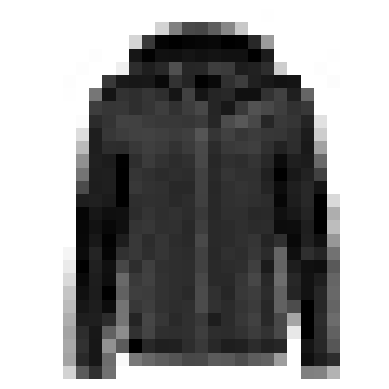

In [9]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(55000,)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


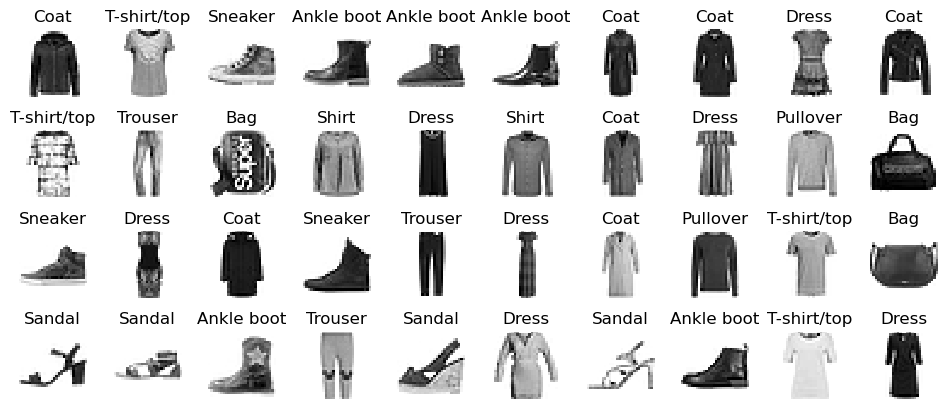

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#!pip install pydot graphviz --user

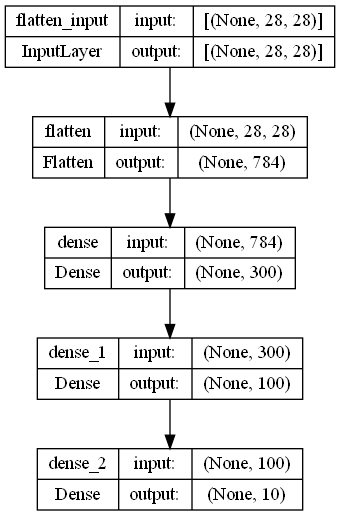

In [21]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7143 - accuracy: 0.7642 - val_loss: 0.5177 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4892 - accuracy: 0.8278 - val_loss: 0.4368 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4438 - accuracy: 0.8440 - val_loss: 0.5222 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4176 - accuracy: 0.8543 - val_loss: 0.3962 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3987 - accuracy: 0.8603 - val_loss: 0.3807 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8660 - val_loss: 0.3749 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8705 - val_loss: 0.3680 - val_accuracy:

In [24]:
history.history.items()

dict_items([('loss', [0.7143305540084839, 0.4892001450061798, 0.4437567889690399, 0.4175664782524109, 0.3986686170101166, 0.37977349758148193, 0.3671698570251465, 0.35546138882637024, 0.34419262409210205, 0.3347625732421875, 0.3259735107421875, 0.31637540459632874, 0.3095386326313019, 0.3031167685985565, 0.2948799431324005, 0.2898304760456085, 0.28398609161376953, 0.27785396575927734, 0.2729959189891815, 0.2673460841178894, 0.2622027099132538, 0.2573075592517853, 0.25315961241722107, 0.2484043836593628, 0.2439499944448471, 0.23987972736358643, 0.23624098300933838, 0.23243796825408936, 0.22831405699253082, 0.22446541488170624]), ('accuracy', [0.764163613319397, 0.8277817964553833, 0.844036340713501, 0.854272723197937, 0.8602908849716187, 0.8659636378288269, 0.8705272674560547, 0.8744727373123169, 0.877963662147522, 0.8819636106491089, 0.8845090866088867, 0.8857272863388062, 0.8894363641738892, 0.8912545442581177, 0.8949272632598877, 0.8971272706985474, 0.8975818157196045, 0.899800002574

Saving figure keras_learning_curves_plot


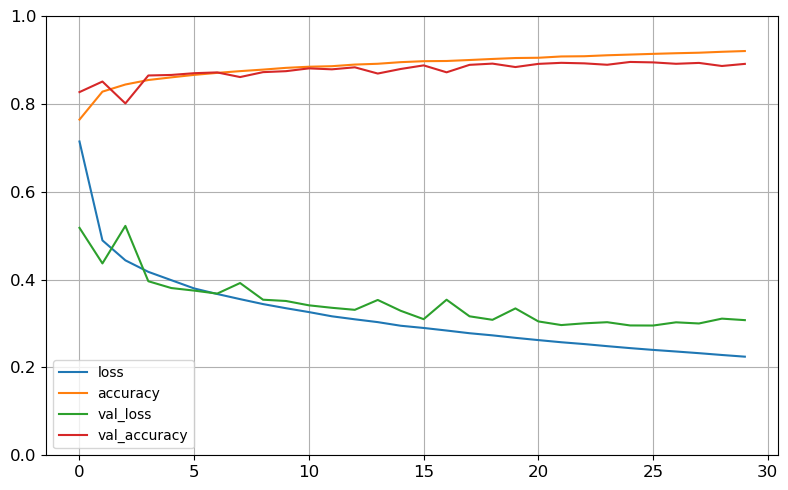

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 814us/step - loss: 0.3487 - accuracy: 0.8777


[0.34873437881469727, 0.8776999711990356]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 65ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

TensorBoard

In [28]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [29]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_07_25-19_22_06'

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

The data input is not correct